In [1]:
# imports

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from hfn import *
import os

In [2]:
images = []
for filename in os.listdir("sample/greyscale/clean"):
    images.append(Image.open(f"sample/greyscale/clean/{filename}").convert('L'))
hopfield = HopfieldComplex(images[0].size)

for i in images:
    k = np.array(i).flatten()
    bits = np.pi * (k / 255)
    states = np.exp(1j * bits)
    hopfield.train_network(states)

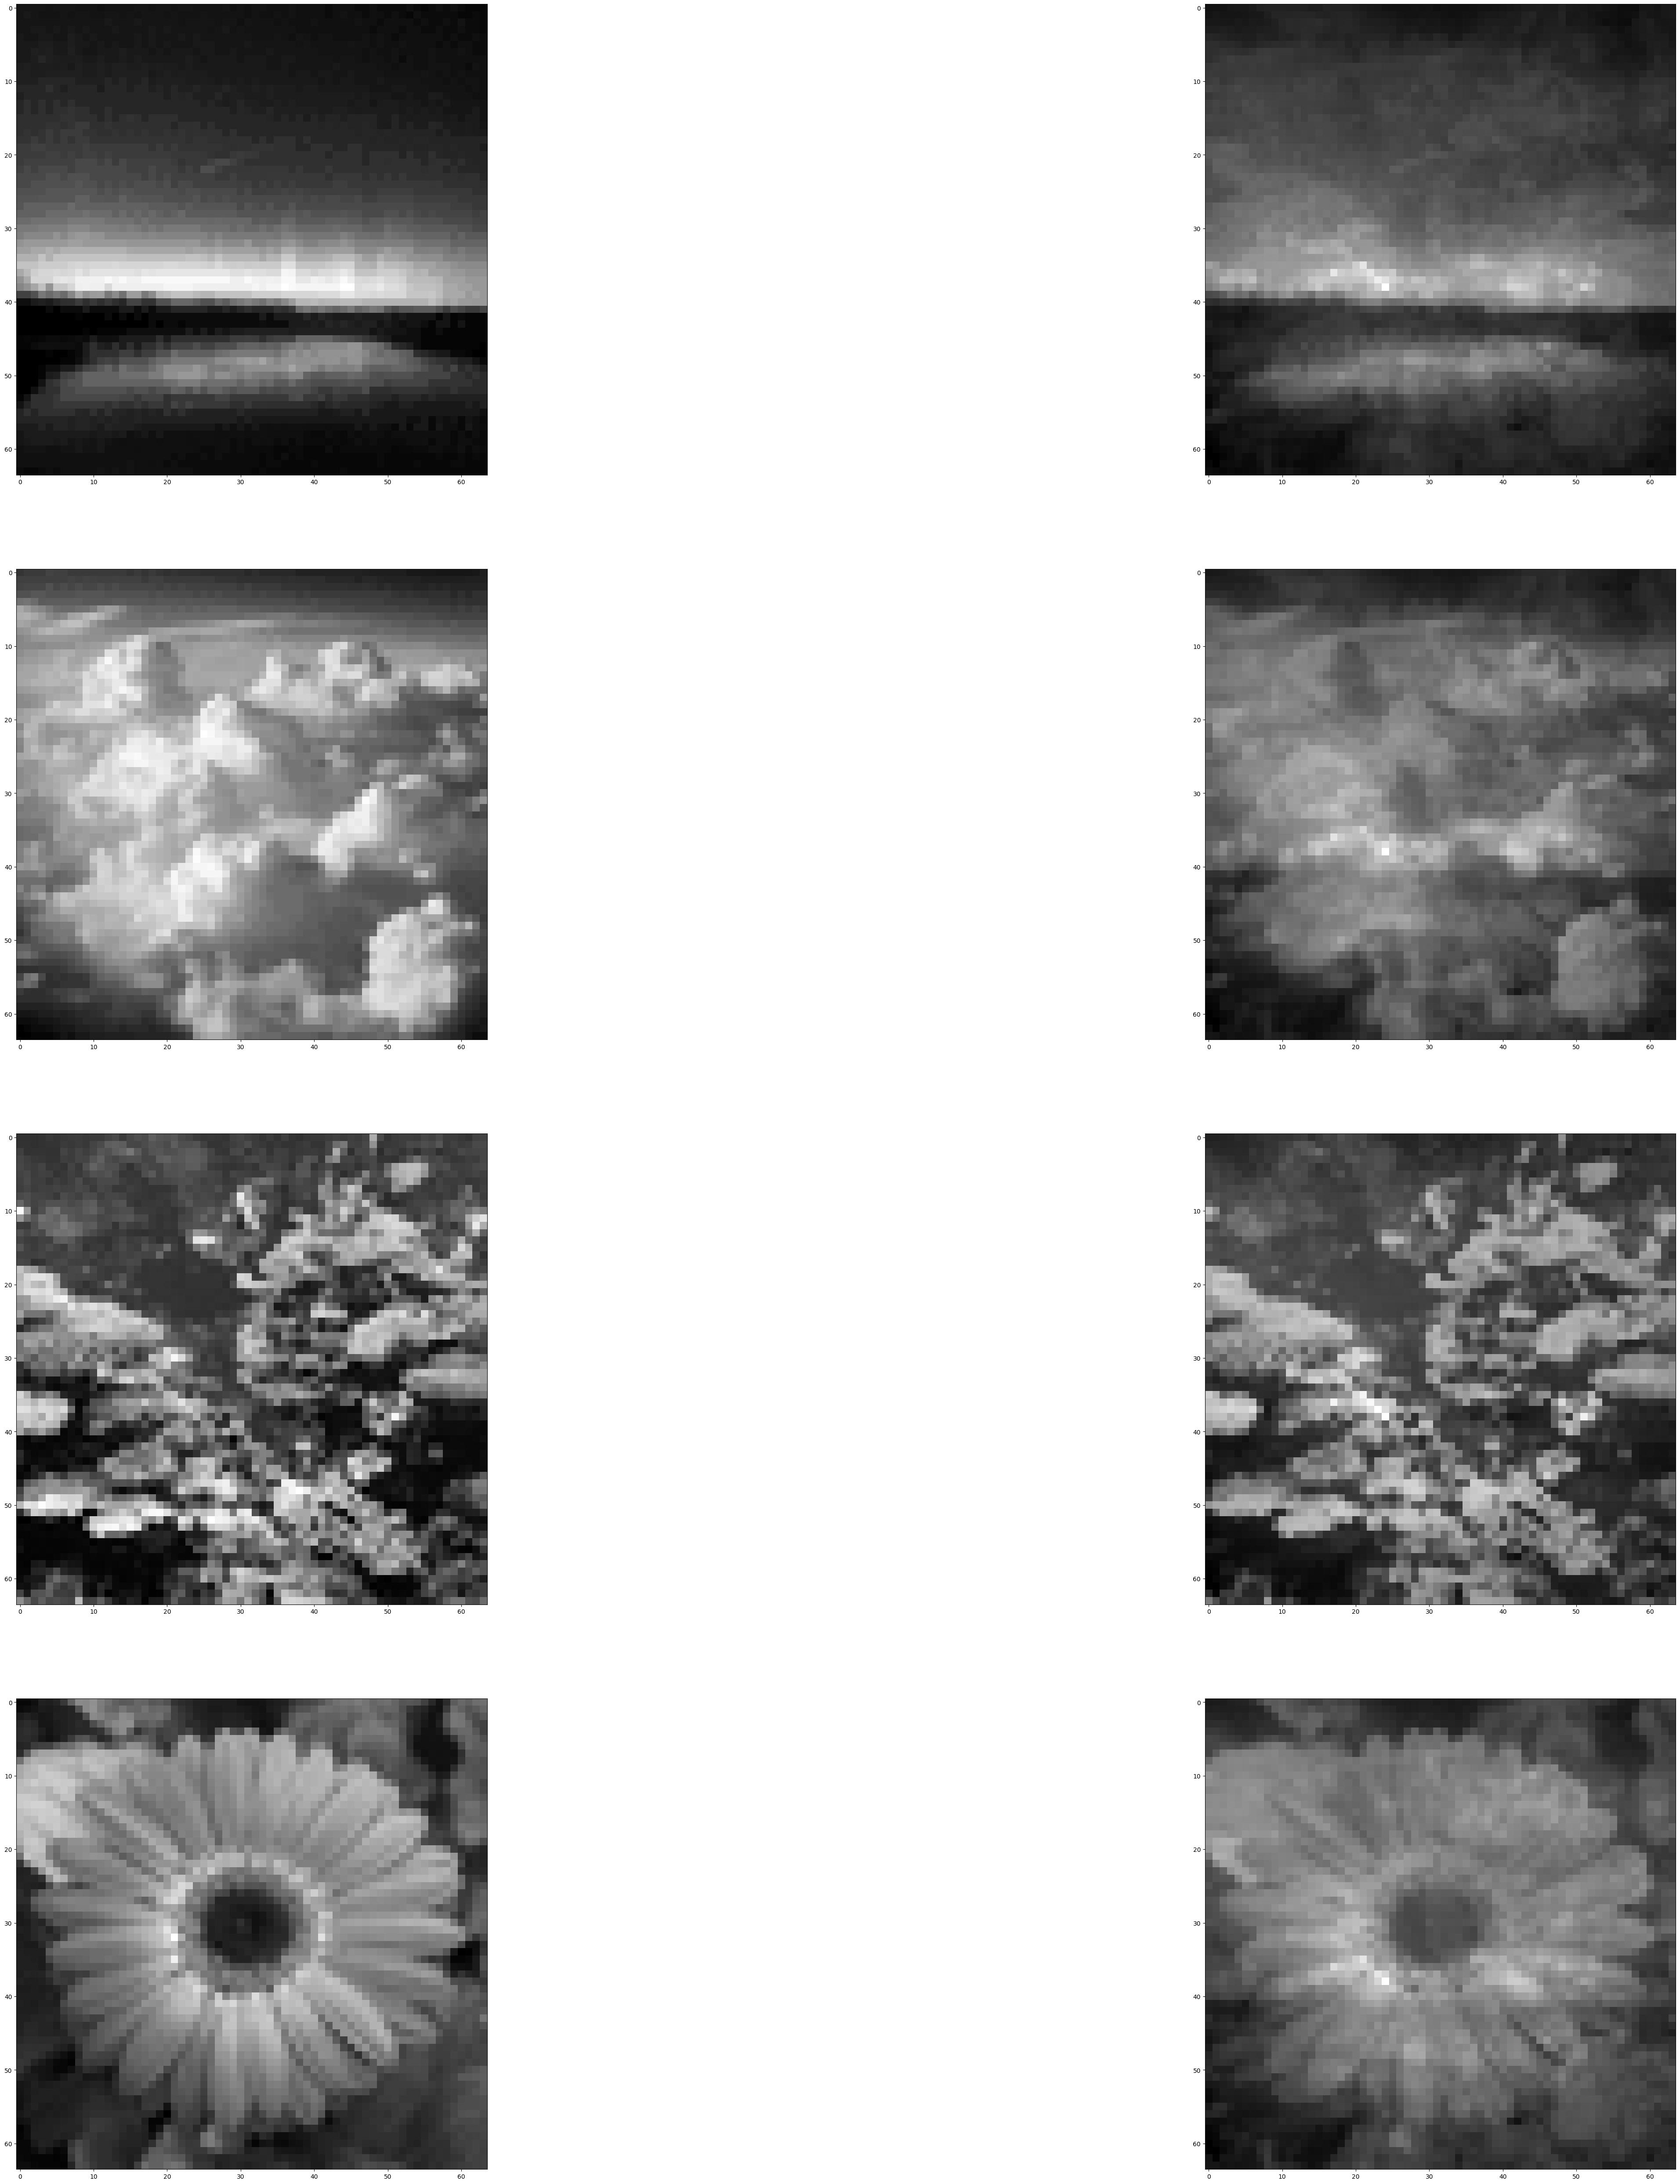

In [3]:
def rescale(dataset, *, inpset = None):
     """
     Input set of values between 0 and 1 to be rescaled
     """
     if inpset is None:
          inpset = np.zeros(dataset.size)
          inpset[0] = 1
     # avg = sum(dataset) / len(dataset)
     # exu = max(dataset)
     # exp = min(dataset)
     # dataset = np.multiply((dataset - avg) / (exu - avg) + avg, dataset > avg) + np.multiply((avg - dataset) / (exp - avg) + avg, dataset <= avg)
     k = (max(inpset) - min(inpset)) *(dataset - min(dataset)) / (max(dataset) - min(dataset)) + min(inpset)
     return k

plt.figure(figsize=images[0].size)
for i in images:
    k = np.array(i).flatten()
    bits = np.pi * (k / 255)
    states = np.exp(1j* bits)
    outp = hopfield.update_sync(states)
    out = 255 * rescale(abs(np.angle(outp)) / np.pi)

    outi = out.reshape(i.size[::-1])

    plt.subplot(len(images), 2, images.index(i) * 2 + 1)
    plt.imshow(i, cmap='gray')

    plt.subplot(len(images), 2, images.index(i) * 2 + 2)
    plt.imshow(Image.fromarray(outi))

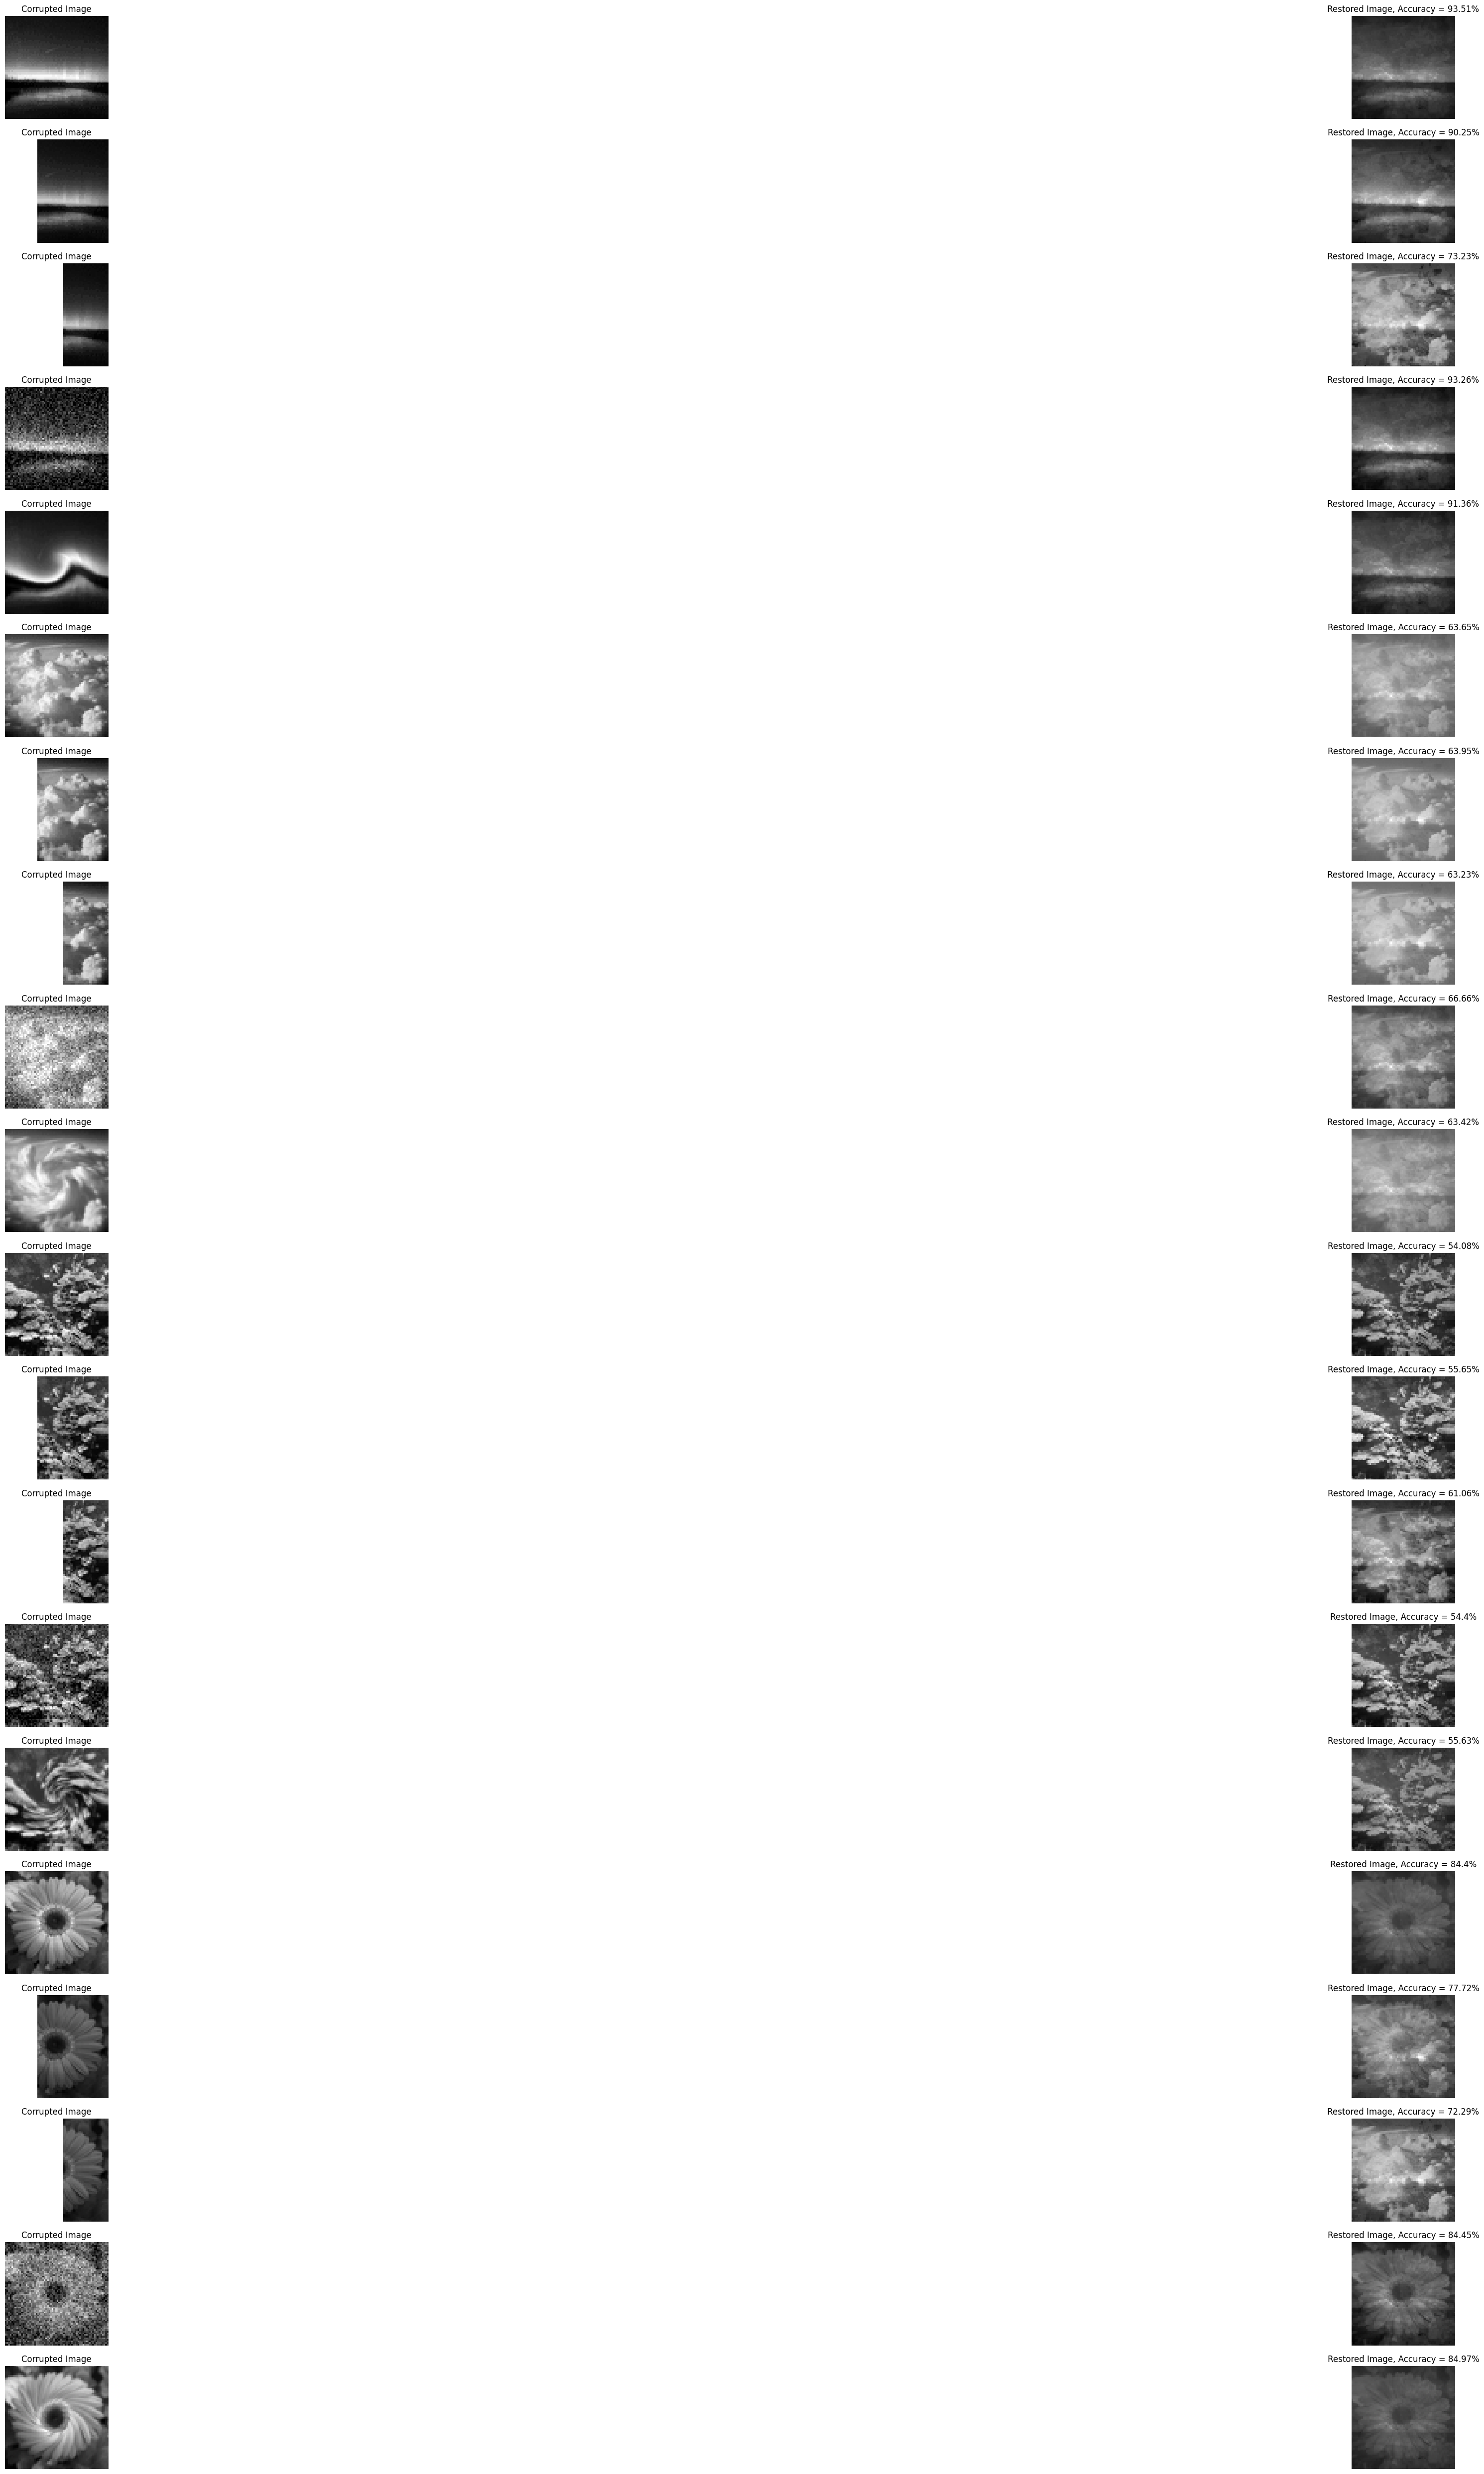

In [4]:
cimages = []
for filename in os.listdir("sample/greyscale/corrupted"):
    cimages.append(Image.open(f"sample/greyscale/corrupted/{filename}").convert('L'))

plt.figure(figsize=cimages[0].size)

for i in cimages:
    k = np.array(i).flatten()
    bits = k / 255
    states = np.exp(1j * bits * np.pi)
    outp = hopfield.update_sync(states)
    out = 255 * rescale(abs(np.angle(outp)) / np.pi, inpset=bits)

    comparison = np.array(cimages[cimages.index(i) // 5]).flatten()
    accuracy = np.round(100 - (100 * sum(abs(comparison - out))) / (255 * np.prod(i.size)), 2)

    outi = out.reshape(i.size[::-1])
    
    plt.subplot(len(cimages), 2, cimages.index(i) * 2 + 1)
    plt.axis('off')
    plt.title('Corrupted Image')
    plt.imshow(i, cmap='gray')

    plt.subplot(len(cimages), 2, cimages.index(i) * 2 + 2)
    plt.axis('off')
    plt.title(f'Restored Image, Accuracy = {accuracy}%')
    plt.imshow(Image.fromarray(outi))

In [5]:
raise(NotImplementedError)

images = []
for filename in os.listdir("sample/faces/clean"):
    images.append(Image.open(f"sample/faces/clean/{filename}").convert('L'))
hopfield = HopfieldComplex(images[0].size)

for i in images:
    k = np.array(i).flatten()
    bits = np.pi * (k / 255)
    states = np.exp(1j * bits)
    hopfield.train_network(states)

NotImplementedError: 

In [ ]:
def rescale(dataset, *, inpset = None):
     """
     Input set of values between 0 and 1 to be rescaled
     """
     if inpset is None:
          inpset = np.zeros(dataset.size)
          inpset[0] = 1
     # avg = sum(dataset) / len(dataset)
     # exu = max(dataset)
     # exp = min(dataset)
     # dataset = np.multiply((dataset - avg) / (exu - avg) + avg, dataset > avg) + np.multiply((avg - dataset) / (exp - avg) + avg, dataset <= avg)
     k = (max(inpset) - min(inpset)) *(dataset - min(dataset)) / (max(dataset) - min(dataset)) + min(inpset)
     return k

plt.figure(figsize=images[0].size)
for i in images:
    k = np.array(i).flatten()
    bits = np.pi * (k / 255)
    states = np.exp(1j* bits)
    outp = hopfield.update_sync(states)
    out = 255 * rescale(abs(np.angle(outp)) / np.pi)

    outi = out.reshape(i.size[::-1])

    plt.subplot(len(images), 2, images.index(i) * 2 + 1)
    plt.imshow(i, cmap='gray')

    plt.subplot(len(images), 2, images.index(i) * 2 + 2)
    plt.imshow(Image.fromarray(outi))

In [ ]:
cimages = []
for filename in os.listdir("sample/faces/corrupted"):
    cimages.append(Image.open(f"sample/faces/corrupted/{filename}").convert('L'))

plt.figure(figsize=cimages[0].size)

for i in cimages:
    k = np.array(i).flatten()
    bits = k / 255
    states = np.exp(1j * bits * np.pi)
    outp = hopfield.update_sync(states)
    out = 255 * rescale(abs(np.angle(outp)) / np.pi, inpset=bits)

    comparison = np.array(cimages[cimages.index(i) // 5]).flatten()
    accuracy = np.round(100 - (100 * sum(abs(comparison - out))) / (255 * np.prod(i.size)), 2)

    outi = out.reshape(i.size[::-1])
    
    plt.subplot(len(cimages), 2, cimages.index(i) * 2 + 1)
    plt.axis('off')
    plt.title('Corrupted Image')
    plt.imshow(i, cmap='gray')

    plt.subplot(len(cimages), 2, cimages.index(i) * 2 + 2)
    plt.axis('off')
    plt.title(f'Restored Image, Accuracy = {accuracy}%')
    plt.imshow(Image.fromarray(outi))